<a href="https://colab.research.google.com/github/dssalim/Desafio-Dio/blob/main/Pandas_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com Planilhas do Excel

In [102]:
#Importando Pandas
import pandas as pd

In [103]:
#Carregando as Planinlhas
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [104]:
#Juntando os dataframes
df = pd.concat([df1,df2,df3,df4,df5])

In [105]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [106]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [107]:
#Mostrando uma amostra do Datafram
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
229,Salvador,2019-01-02,43.08,1036,2
170,Natal,2019-01-02,9.26,1035,3
115,Recife,2019-03-02,12.23,981,3
118,Aracaju,2018-01-01,3.34,1522,1
92,Recife,2019-01-01,163.02,981,4


In [108]:
#consultando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [109]:
#Alterando o Tipo de dados da Coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [110]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [111]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Tratando Valores Faltantes

In [112]:
#Consutando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [113]:
df["Vendas"].mean()

122.61180089485458

#Criando Colunas

In [114]:
#Criando uma coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [115]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [116]:
df["Receita"].max()

3544.0

In [117]:
df["Receita"].min()

3.34

In [118]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [119]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [120]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [121]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#Trabalhando com Datas

In [122]:
#Transformando a Coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [123]:
#verificando tipo
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [124]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [125]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [126]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [127]:
#criando a coluna com ano
df["Ano_venda"] = df["Data"].dt.year

In [128]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
116,Natal,2019-01-02,41.78,1034,3,125.34,2019
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019
53,Recife,2019-01-01,37.05,983,6,222.30,2019
64,Aracaju,2018-01-01,21.00,1523,5,105.00,2018
56,Recife,2019-01-01,7.98,983,5,39.90,2019


In [129]:
#extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [130]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
20,Salvador,2019-01-01,33.97,1034,3,101.91,2019,1,1
99,Aracaju,2018-01-01,139.32,1521,3,417.96,2018,1,1
61,Aracaju,2018-01-01,39.80,1520,6,238.80,2018,1,1
121,Aracaju,2018-01-01,162.07,1520,3,486.21,2018,1,1
99,Recife,2019-01-01,136.72,980,4,546.88,2019,1,1


In [131]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [132]:
#Calculando a Diferença de dias
df["semestre_venda"] = df["Data"] - df["Data"].min()

In [133]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,semestre_venda
131,Fortaleza,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days
67,Natal,2019-02-14,379.00,852,2,758.00,2019,2,14,409 days
76,Salvador,2019-01-01,39.51,1035,3,118.53,2019,1,1,365 days
64,Aracaju,2018-01-01,21.00,1523,5,105.00,2018,1,1,0 days
103,Salvador,2019-01-01,191.60,1034,1,191.60,2019,1,1,365 days


In [134]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [135]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,semestre_venda,trimestre_venda
105,Salvador,2019-01-01,32.83,1037,1,32.83,2019,1,1,365 days,1
16,Recife,2019-01-01,19.95,980,8,159.60,2019,1,1,365 days,1
104,Natal,2019-01-02,188.79,1036,3,566.37,2019,1,2,366 days,1
76,Fortaleza,2019-01-01,38.61,1004,4,154.44,2019,1,1,365 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2019,3,2,425 days,1


In [136]:
#Filtrando as vendas de 2019 dp mes de Março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [137]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,semestre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# Visualização de Dados

In [138]:
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

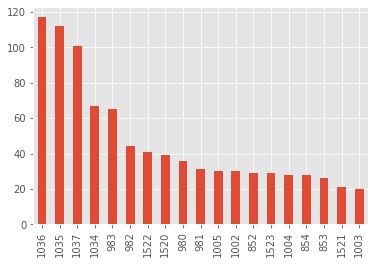

In [139]:
#Grafico com barras verticais
df["LojaID"].value_counts(ascending = False).plot.bar()

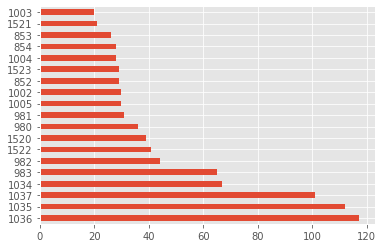

In [140]:
#Grafico com barras horizontais
df["LojaID"].value_counts(ascending = False).plot.barh()

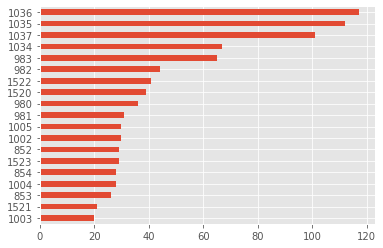

In [141]:
#Grafico com barras horizontais maior para o menor
df["LojaID"].value_counts(ascending = True).plot.barh()

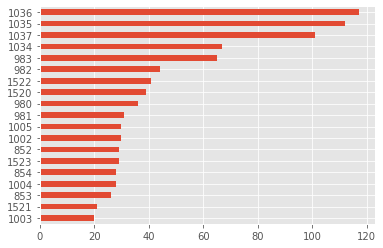

In [142]:
#Grafico com barras horizontais maior para o menor. Ponto e virgula faz o grafico sair sem a linha de endereço
df["LojaID"].value_counts(ascending = True).plot.barh();

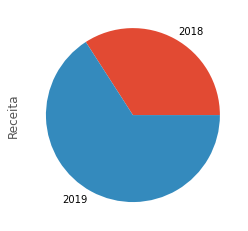

In [143]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [144]:
 #Total de vendas por cidade
 df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

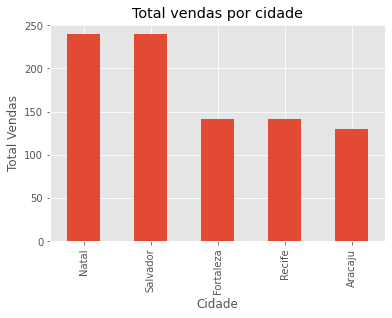

In [145]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

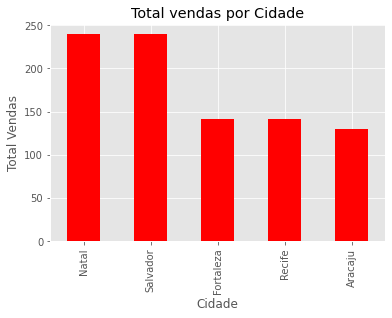

In [146]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [147]:
#Alterando o Estilo
plt.style.use("ggplot")

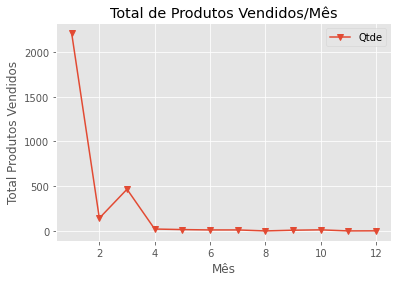

In [154]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos/Mês", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [149]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [151]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

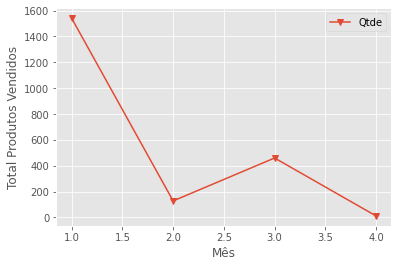

In [157]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [156]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()


mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

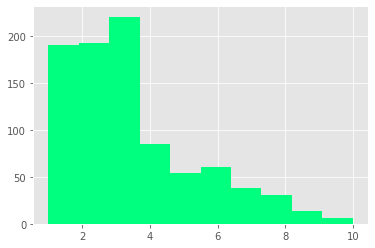

In [161]:
#Histograma
plt.hist(df["Qtde"], color = "springgreen");

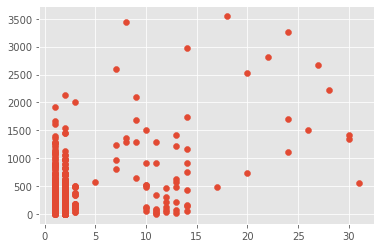

In [160]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

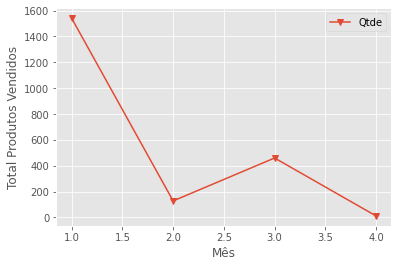

In [162]:
#Salvando em PNg

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();
plt.savefig("grafico QTDE x MEX.png")